# Preprocessing dan implementasi Cosinus Similarity

## **Menampilkan data**

In [58]:
import requests
import csv
import pandas as pd
import re
import nltk

In [59]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [60]:
dataf = pd.read_csv('/content/drive/MyDrive/ppw/CosinusSimiliarity/databeritasatu.com/databeritasatu.csv')
dataf

,Kategori,Judul,Tanggal,Link,Konten
0,Pemilu,"Gelar Dialog Kebangsaan, Kapolda Maluku Harap ...",5 jam yang lalu,https://www.beritasatu.com/nusantara/2780002/g...,"Ambon, Beritasatu.com - Polda Maluku menggelar..."
1,Pemilu,Puluhan APK Caleg di Kota Semarang Ditertibkan...,5 jam yang lalu,https://www.beritasatu.com/nusantara/2779999/p...,"Semarang, Beritasatu.com - Sekitar 60 alat per..."
2,Pemilu,"Langgar Aturan, Bawaslu Polman Tertibkan Ratus...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779992/l...,"Polewali Mandar, Beritasatu.com - Badan Pengaw..."
3,Pemilu,"Deklarasi Pemilu Damai 2024, TNI dan Polri Tub...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779983/d...,"Tuban, Beritasatu.com – Komandan Kodim (Dandim..."
4,Pemilu,"Respons Putusan MKMK, Anwar Usman: Ada Skenari...",10 jam yang lalu,https://www.beritasatu.com/nasional/2779964/re...,"Jakarta, Beritasatu.com - Hakim Mahkamah Konst..."
...,...,...,...,...,...
1232,Techno,Inilah Daftar Lengkap Pemenang AMI Awards 2012,5 Jul 2012 | 09:47 WIB,https://www.beritasatu.com/news/58200/inilah-d...,Agnes dan Afgan berbagi penghargaanrrAjang pen...
1233,Techno,Oka Sulaksana Tampil di ABG,7 Jun 2012 | 16:25 WIB,https://www.beritasatu.com/news/52678/oka-sula...,"Oka nantinya akan turun di kelas ""techno"" putr..."
1234,Techno,"Saat Pemakai Terangsang, Gaun ini Jadi Trasparan",5 Apr 2012 | 15:42 WIB,https://www.beritasatu.com/news/41000/saat-pem...,"Gaun ini segera dipasarkan.rrIntimacy 2.0, ada..."
1235,Techno,Situs Mobil Esemka Palsu Beredar,24 Feb 2012 | 13:43 WIB,https://www.beritasatu.com/ekonomi/33442/situs...,Pelaku membuat website palsu http://www.mobile...


### Cek data null

In [61]:
dataf.isnull().sum()

Kategori    0
Judul       0
Tanggal     0
Link        0
Konten      2
dtype: int64

### Hapus data null

In [62]:
df = dataf.dropna()
df.isnull().sum()

Kategori    0
Judul       0
Tanggal     0
Link        0
Konten      0
dtype: int64

### Reset Index

In [63]:
df = df.reset_index(drop=True)

In [64]:
df.shape

(1235, 5)

### Menghitung jumlah data perkategori

In [65]:
df['Kategori'].value_counts()

Sport     500
Pemilu    498
Techno    237
Name: Kategori, dtype: int64

## Preprocessing

### Cleaning data

In [66]:
# Daftar kata yang ingin dihilangkan
kata_hapus = ['Advertisement', 'Beritasatu.com', '\n']

# Melakukan pengolahan pada setiap baris di kolom 'Konten'
for kata in kata_hapus:
    df['Konten'] = df['Konten'].str.replace(kata, '')

# Menampilkan DataFrame setelah pengolahan
print(df)

     Kategori                                              Judul  \
0      Pemilu  Gelar Dialog Kebangsaan, Kapolda Maluku Harap ...   
1      Pemilu  Puluhan APK Caleg di Kota Semarang Ditertibkan...   
2      Pemilu  Langgar Aturan, Bawaslu Polman Tertibkan Ratus...   
3      Pemilu  Deklarasi Pemilu Damai 2024, TNI dan Polri Tub...   
4      Pemilu  Respons Putusan MKMK, Anwar Usman: Ada Skenari...   
...       ...                                                ...   
1230   Techno     Inilah Daftar Lengkap Pemenang AMI Awards 2012   
1231   Techno                        Oka Sulaksana Tampil di ABG   
1232   Techno   Saat Pemakai Terangsang, Gaun ini Jadi Trasparan   
1233   Techno                   Situs Mobil Esemka Palsu Beredar   
1234   Techno       Mobil Esemka Diuji Coba dari Solo ke Jakarta   

                      Tanggal  \
0             5 jam yang lalu   
1             5 jam yang lalu   
2             7 jam yang lalu   
3             7 jam yang lalu   
4            10 ja

<ipython-input-66-2303c42add5a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  df['Konten'] = df['Konten'].str.replace(kata, '')


In [67]:
df.shape

(1235, 5)

In [68]:
df['cleaning'] = df['Konten'].str.replace(r'[^\w\s,.?!]', '', regex=True).str.lower()
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning
0,Pemilu,"Gelar Dialog Kebangsaan, Kapolda Maluku Harap ...",5 jam yang lalu,https://www.beritasatu.com/nusantara/2780002/g...,"Ambon, - Polda Maluku menggelar dialog kebang...","ambon, polda maluku menggelar dialog kebangs..."
1,Pemilu,Puluhan APK Caleg di Kota Semarang Ditertibkan...,5 jam yang lalu,https://www.beritasatu.com/nusantara/2779999/p...,"Semarang, - Sekitar 60 alat peraga kampanye (...","semarang, sekitar 60 alat peraga kampanye ap..."
2,Pemilu,"Langgar Aturan, Bawaslu Polman Tertibkan Ratus...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779992/l...,"Polewali Mandar, - Badan Pengawas Pemilu (Baw...","polewali mandar, badan pengawas pemilu bawas..."
3,Pemilu,"Deklarasi Pemilu Damai 2024, TNI dan Polri Tub...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779983/d...,"Tuban, – Komandan Kodim (Dandim) 0811/Tuban, ...","tuban, komandan kodim dandim 0811tuban, bers..."
4,Pemilu,"Respons Putusan MKMK, Anwar Usman: Ada Skenari...",10 jam yang lalu,https://www.beritasatu.com/nasional/2779964/re...,"Jakarta, - Hakim Mahkamah Konstitusi (MK) Anw...","jakarta, hakim mahkamah konstitusi mk anwar ..."
...,...,...,...,...,...,...
1230,Techno,Inilah Daftar Lengkap Pemenang AMI Awards 2012,5 Jul 2012 | 09:47 WIB,https://www.beritasatu.com/news/58200/inilah-d...,Agnes dan Afgan berbagi penghargaanrrAjang pen...,agnes dan afgan berbagi penghargaanrrajang pen...
1231,Techno,Oka Sulaksana Tampil di ABG,7 Jun 2012 | 16:25 WIB,https://www.beritasatu.com/news/52678/oka-sula...,"Oka nantinya akan turun di kelas ""techno"" putr...","oka nantinya akan turun di kelas techno putra,..."
1232,Techno,"Saat Pemakai Terangsang, Gaun ini Jadi Trasparan",5 Apr 2012 | 15:42 WIB,https://www.beritasatu.com/news/41000/saat-pem...,"Gaun ini segera dipasarkan.rrIntimacy 2.0, ada...","gaun ini segera dipasarkan.rrintimacy 2.0, ada..."
1233,Techno,Situs Mobil Esemka Palsu Beredar,24 Feb 2012 | 13:43 WIB,https://www.beritasatu.com/ekonomi/33442/situs...,Pelaku membuat website palsu http://www.mobile...,pelaku membuat website palsu httpwww.mobilesem...


### Tokenisasi

In [69]:
nltk.download('punkt')
from nltk.tokenize import sent_tokenize

# # Ubah kolom Konten menjadi string
# df['cleaning'] = df['cleaning'].astype(str)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [70]:
# Tokenisasi teks menjadi kalimat menggunakan nltk
df['tokenize'] = df['cleaning'].apply(nltk.sent_tokenize)
df

,Kategori,Judul,Tanggal,Link,Konten,cleaning,tokenize
0,Pemilu,"Gelar Dialog Kebangsaan, Kapolda Maluku Harap ...",5 jam yang lalu,https://www.beritasatu.com/nusantara/2780002/g...,"Ambon, - Polda Maluku menggelar dialog kebang...","ambon, polda maluku menggelar dialog kebangs...","[ambon, polda maluku menggelar dialog kebang..."
1,Pemilu,Puluhan APK Caleg di Kota Semarang Ditertibkan...,5 jam yang lalu,https://www.beritasatu.com/nusantara/2779999/p...,"Semarang, - Sekitar 60 alat peraga kampanye (...","semarang, sekitar 60 alat peraga kampanye ap...","[semarang, sekitar 60 alat peraga kampanye a..."
2,Pemilu,"Langgar Aturan, Bawaslu Polman Tertibkan Ratus...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779992/l...,"Polewali Mandar, - Badan Pengawas Pemilu (Baw...","polewali mandar, badan pengawas pemilu bawas...","[polewali mandar, badan pengawas pemilu bawa..."
3,Pemilu,"Deklarasi Pemilu Damai 2024, TNI dan Polri Tub...",7 jam yang lalu,https://www.beritasatu.com/nusantara/2779983/d...,"Tuban, – Komandan Kodim (Dandim) 0811/Tuban, ...","tuban, komandan kodim dandim 0811tuban, bers...","[tuban, komandan kodim dandim 0811tuban, ber..."
4,Pemilu,"Respons Putusan MKMK, Anwar Usman: Ada Skenari...",10 jam yang lalu,https://www.beritasatu.com/nasional/2779964/re...,"Jakarta, - Hakim Mahkamah Konstitusi (MK) Anw...","jakarta, hakim mahkamah konstitusi mk anwar ...","[jakarta, hakim mahkamah konstitusi mk anwar..."
...,...,...,...,...,...,...,...
1230,Techno,Inilah Daftar Lengkap Pemenang AMI Awards 2012,5 Jul 2012 | 09:47 WIB,https://www.beritasatu.com/news/58200/inilah-d...,Agnes dan Afgan berbagi penghargaanrrAjang pen...,agnes dan afgan berbagi penghargaanrrajang pen...,[agnes dan afgan berbagi penghargaanrrajang pe...
1231,Techno,Oka Sulaksana Tampil di ABG,7 Jun 2012 | 16:25 WIB,https://www.beritasatu.com/news/52678/oka-sula...,"Oka nantinya akan turun di kelas ""techno"" putr...","oka nantinya akan turun di kelas techno putra,...",[oka nantinya akan turun di kelas techno putra...
1232,Techno,"Saat Pemakai Terangsang, Gaun ini Jadi Trasparan",5 Apr 2012 | 15:42 WIB,https://www.beritasatu.com/news/41000/saat-pem...,"Gaun ini segera dipasarkan.rrIntimacy 2.0, ada...","gaun ini segera dipasarkan.rrintimacy 2.0, ada...","[gaun ini segera dipasarkan.rrintimacy 2.0, ad..."
1233,Techno,Situs Mobil Esemka Palsu Beredar,24 Feb 2012 | 13:43 WIB,https://www.beritasatu.com/ekonomi/33442/situs...,Pelaku membuat website palsu http://www.mobile...,pelaku membuat website palsu httpwww.mobilesem...,[pelaku membuat website palsu httpwww.mobilese...


### TF IDF

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [72]:
tfidf_matrices = []
set_len_doc = df['tokenize']
for i in set_len_doc: #perulangan setiap artikel/dokumen

  tfidf_vectorizer = TfidfVectorizer()  #inisialisasi tfidf
  tfidf_matrix = tfidf_vectorizer.fit_transform(i) #menjadikan tfidf setiap dokumen
  tfidf_matrices.append(tfidf_matrix) #memasukkan hasil matrix tfidf ke tfidf_matrices

In [73]:
for xdoc, tfidf_matrix in enumerate(tfidf_matrices):
    print(f'========== Document ke-{xdoc} ==========')

    # Loop untuk setiap kalimat dalam dokumen
    for isentence, sentence_tfidf in enumerate(tfidf_matrix.toarray()):
        print(f'Kalimat ke-{isentence + 1}: ', end='')

        # Loop untuk setiap kata dalam kalimat
        for word_idx, tfidf_value in enumerate(sentence_tfidf):
            if tfidf_value > 0:
                print(f'[{word_idx + 1}:{tfidf_value:.4f}], ', end='')

        print()  # Memberikan baris kosong antara kalimat

    print('\n')  # Memberikan baris kosong antara dokumen


Streaming output truncated to the last 5000 lines.
Kalimat ke-3: [8:0.1580], [12:0.1580], [22:0.1173], [24:0.1580], [39:0.1904], [44:0.1904], [56:0.1904], [69:0.1027], [70:0.1904], [71:0.1580], [87:0.3808], [102:0.1904], [108:0.1904], [112:0.1580], [141:0.3161], [146:0.1173], [168:0.3161], [173:0.1904], [174:0.1904], [182:0.1027], [183:0.1904], [199:0.1027], [206:0.3808], 
Kalimat ke-4: [19:0.2805], [22:0.1728], [26:0.2805], [55:0.2328], [73:0.2805], [78:0.1728], [91:0.1990], [132:0.2805], [137:0.1728], [141:0.2328], [151:0.2805], [159:0.2805], [176:0.2805], [184:0.2805], [193:0.2328], [201:0.2805], 
Kalimat ke-5: [21:0.1491], [23:0.1238], [34:0.1491], [36:0.1491], [40:0.1491], [43:0.1238], [45:0.1491], [49:0.0919], [53:0.2476], [60:0.1238], [63:0.2116], [65:0.1491], [69:0.1609], [72:0.1491], [75:0.2116], [93:0.1491], [99:0.1238], [100:0.1238], [105:0.1491], [115:0.1491], [124:0.1238], [125:0.1238], [128:0.1491], [130:0.1491], [134:0.1238], [139:0.0919], [142:0.2116], [149:0.1491], [16

### Cosine Similarity

In [74]:
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx

cos_sim_results = []  # untuk menyimpan hasil cosine similarity akhir
graf_results = []  # untuk menyimpan hasil graf akhir
threshold = 0.08  # inisialisasi threshold

for idx, tfidf_matrix in enumerate(tfidf_matrices):
    # print(f'========= Document ke-{idx} ==========')

    cos_sim_now = []
    graf_now = nx.DiGraph()
    cos_sim = cosine_similarity(tfidf_matrix)  # mengubah tfidf menjadi cosine similarity

    for i_hasil in range(len(cos_sim)):  # inisialisasi indeks awal perulangan dari setiap hasil cosine
        arr_cosim = []

        for j_hasil in range(i_hasil + 1, len(cos_sim)):  # inisialisasi indeks kedua perulangan dari setiap hasil cosine
            if cos_sim[i_hasil][j_hasil] > threshold:  # cek apakah cosim dari kalimat 1 dan 2 lebih dari threshold?
                # print(f'Similarity kalimat ke - {i_hasil} : {j_hasil} = {cos_sim[i_hasil][j_hasil]}')

                arr_cosim.append([i_hasil, j_hasil, cos_sim[i_hasil][j_hasil]])  # menyimpan nilai indeks awal, indeks awal+1, hasil cosim
                graf_now.add_edge(i_hasil, j_hasil, weight=cos_sim[i_hasil][j_hasil])  # menyimpan nilai indeks awal, indeks awal+1, bobot=hasil cosim

        cos_sim_now.append(arr_cosim)
        # graf_now.append(graf_current)
    cos_sim_results.append(cos_sim_now)
    graf_results.append(graf_now)
    # print('\n')


In [75]:
# Menampilkan hasil cosine similarity
for idx, cos_sim_now in enumerate(cos_sim_results):
    print(f'========= Document ke-{idx} ==========')
    for i, arr_cosim in enumerate(cos_sim_now):
        for similarity_info in arr_cosim:
            sentence1, sentence2, similarity_value = similarity_info
            print(f'- Nilai Cosine Similarity kalimat {sentence1 + 1} - {sentence2 + 1} = {similarity_value:.4f}')
    print('\n')


Streaming output truncated to the last 5000 lines.
- Nilai Cosine Similarity kalimat 4 - 6 = 0.0886
- Nilai Cosine Similarity kalimat 4 - 8 = 0.1078
- Nilai Cosine Similarity kalimat 4 - 9 = 0.1129
- Nilai Cosine Similarity kalimat 5 - 6 = 0.1880
- Nilai Cosine Similarity kalimat 6 - 7 = 0.1723
- Nilai Cosine Similarity kalimat 6 - 9 = 0.2000
- Nilai Cosine Similarity kalimat 7 - 9 = 0.1186
- Nilai Cosine Similarity kalimat 9 - 10 = 0.1595
- Nilai Cosine Similarity kalimat 9 - 11 = 0.1546
- Nilai Cosine Similarity kalimat 10 - 11 = 0.1016


========= Document ke-1109 ==========
- Nilai Cosine Similarity kalimat 1 - 2 = 0.1225
- Nilai Cosine Similarity kalimat 1 - 8 = 0.2309
- Nilai Cosine Similarity kalimat 1 - 13 = 0.0913
- Nilai Cosine Similarity kalimat 1 - 14 = 0.2646
- Nilai Cosine Similarity kalimat 2 - 3 = 0.1905
- Nilai Cosine Similarity kalimat 2 - 5 = 0.2885
- Nilai Cosine Similarity kalimat 2 - 7 = 0.3677
- Nilai Cosine Similarity kalimat 2 - 8 = 0.4295
- Nilai Cosine Simila

### Closenes Centrality

In [76]:
# import library untuk graph
import matplotlib.pyplot as plt

In [77]:
# (Cek) Hitung closeness centrality
closeness_centrality = nx.closeness_centrality(graf_results[1234])
closeness_centrality

{0: 0.0,
 4: 0.16666666666666666,
 7: 0.2222222222222222,
 10: 0.2722222222222222,
 11: 0.34615384615384615,
 14: 0.5714285714285714,
 15: 0.49415204678362573,
 18: 0.5681818181818181,
 1: 0.0,
 6: 0.1111111111111111,
 2: 0.0,
 12: 0.27350427350427353,
 13: 0.21428571428571427,
 3: 0.0,
 9: 0.05555555555555555,
 5: 0.12698412698412698,
 8: 0.1701388888888889,
 16: 0.1701388888888889,
 17: 0.18}

Pengurutan dengan nilai terbesar

In [78]:
sorted_closeness = dict(sorted(closeness_centrality.items(), key=lambda item: item[1], reverse=True))
sorted_closeness

{14: 0.5714285714285714,
 18: 0.5681818181818181,
 15: 0.49415204678362573,
 11: 0.34615384615384615,
 12: 0.27350427350427353,
 10: 0.2722222222222222,
 7: 0.2222222222222222,
 13: 0.21428571428571427,
 17: 0.18,
 8: 0.1701388888888889,
 16: 0.1701388888888889,
 4: 0.16666666666666666,
 5: 0.12698412698412698,
 6: 0.1111111111111111,
 9: 0.05555555555555555,
 0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0}

Print hasil Closenes Centrality

In [79]:
for i in range(len(graf_results)):
  print(f'========= document ke-{i} ===============')
  clos_cen = nx.closeness_centrality(graf_results[i]) #menjadikan graf setiap index list diclosness
  # print(clos_cen)
  for key, result in clos_cen.items():
    print(f'Closenes Centrality Node {key} = {result}')

  print('\n')

Streaming output truncated to the last 5000 lines.
Closenes Centrality Node 10 = 0.043478260869565216
Closenes Centrality Node 22 = 0.6185133239831696
Closenes Centrality Node 18 = 0.3710144927536232
Closenes Centrality Node 13 = 0.3295194508009153
Closenes Centrality Node 8 = 0.0


========= document ke-838 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.09090909090909091
Closenes Centrality Node 4 = 0.18181818181818182
Closenes Centrality Node 5 = 0.2727272727272727
Closenes Centrality Node 9 = 0.29090909090909095
Closenes Centrality Node 11 = 0.5259740259740261
Closenes Centrality Node 6 = 0.29090909090909095
Closenes Centrality Node 8 = 0.494949494949495
Closenes Centrality Node 10 = 0.4909090909090909
Closenes Centrality Node 2 = 0.0
Closenes Centrality Node 7 = 0.3246753246753247
Closenes Centrality Node 3 = 0.0


========= document ke-839 ===============
Closenes Centrality Node 0 = 0.0
Closenes Centrality Node 1 = 0.125
Closenes Centrality Node 2

### **Summarize**

In [80]:
list_ringkasan = []

for i in range(len(graf_results)):
    closeness_centrality_all = nx.closeness_centrality(graf_results[i])
    sorted_closeness_all = dict(sorted(closeness_centrality_all.items(), key=lambda item: item[1], reverse=True))

    nilaimaxkalimat = []
    for x in range(4):
        max_key = None
        max_value = None

        for key, value in sorted_closeness_all.items():
            if key not in nilaimaxkalimat and (max_value is None or value > max_value):
                max_key = key
                max_value = value

        if max_key is not None:
            nilaimaxkalimat.append(max_key)

    data_ringkasan = []
    for j in nilaimaxkalimat:
        ringkasan = df['tokenize'][i][j]
        data_ringkasan.append(ringkasan)

    list_ringkasan.append(data_ringkasan)

list_ringkasan

[['pemilu pemilu 2024 dialog kebangsaan dialog kebangsaan polda maluku pemilu damai',
  'hindari menyebarkan berita palsu karena dapat merusak integritas pemilu dan menimbulkan polarisasi serta perpecahan dalam masyarakat, pungkasnya.kegiatan dialog kebangsaan ini dihadiri oleh penyelenggara pemilu, yakni kpu, bawaslu, tni, polri, pemda, tokoh agama, tokoh masyarakat, okp, dan insan pers di ambon, maluku.',
  'acara dialog kebangsaan bertujuan untuk mewujudkan pemilu damai tahun 2024, sehingga dapat berjalan dengan lancar, aman, dan damai.saya selaku kapolda maluku mengucapkan terima kasih dan apresiasi kepada tni polri, pemda, kpu, bawaslu, okp, tokoh agama, tokoh masyarakat, dan insan pers atas sinergitas, koordinasi, dan komunikasi yang terjalin selama ini, kata kapolda maluku irjen pol lotharia latif saat membuka dialog kebangsaan.dalam dialog kebangsaan kali ini mengusung tema peran masyarakat dalam mewujudkan pemilu 2024 yang aman dan damai sebagai sarana integrasi bangsa di wila

In [81]:
# Penggabungan kalimat ringkasan
dataSummary = pd.DataFrame(list_ringkasan, columns=['Ringkasan1', 'Ringkasan2', 'Ringkasan3', 'Ringkasan4'])
dataSummary['Ringkasan'] = dataSummary.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
dataSummary = pd.concat([dataSummary['Ringkasan'], df['Kategori']], axis=1)


In [82]:
dataSummary

,Ringkasan,Kategori
0,pemilu pemilu 2024 dialog kebangsaan dialog ke...,Pemilu
1,koordinasi dengan badan pengawas pemilu bawasl...,Pemilu
2,"oleh karena itu, mereka sengaja menutupnya aga...",Pemilu
3,kami akan menerjunkan kurang lebih 23 kekuatan...,Pemilu
4,mkmk anwar usman mahkamah konstitusi mkmk memb...,Pemilu
...,...,...
1230,karya produksi terbaikterbaik rindu agnes mon...,Techno
1231,"tapi, kemungkinan menjadi pelatih, karena kela...",Techno
1232,dan itu biasanya terjadi saat seseorang terang...,Techno
1233,"situs esemka palsu rrdengan modus penipuan, pe...",Techno


In [83]:
#Simpan ke csv
dataSummary.to_csv('/content/drive/MyDrive/ppw/CosinusSimiliarity/databeritasatu.com/ringkasan.csv', index=False)

## Modelling Data Ringkasan / Summary

In [84]:
dataSummary = pd.read_csv('/content/drive/MyDrive/ppw/CosinusSimiliarity/databeritasatu.com/ringkasan.csv')
dataSummary

,Ringkasan,Kategori
0,pemilu pemilu 2024 dialog kebangsaan dialog ke...,Pemilu
1,koordinasi dengan badan pengawas pemilu bawasl...,Pemilu
2,"oleh karena itu, mereka sengaja menutupnya aga...",Pemilu
3,kami akan menerjunkan kurang lebih 23 kekuatan...,Pemilu
4,mkmk anwar usman mahkamah konstitusi mkmk memb...,Pemilu
...,...,...
1230,karya produksi terbaikterbaik rindu agnes mon...,Techno
1231,"tapi, kemungkinan menjadi pelatih, karena kela...",Techno
1232,dan itu biasanya terjadi saat seseorang terang...,Techno
1233,"situs esemka palsu rrdengan modus penipuan, pe...",Techno


### Preprocessing

In [85]:
dataSummary.isnull().sum()

Ringkasan    5
Kategori     0
dtype: int64

In [86]:
dataringkas = dataSummary.dropna()
dataringkas.isnull().sum()

Ringkasan    0
Kategori     0
dtype: int64

In [87]:
dataringkas['Kategori'].value_counts()

Sport     499
Pemilu    496
Techno    235
Name: Kategori, dtype: int64

### Punctuation

Punctuation dalam NLP merujuk pada karakter tanda baca seperti titik (. ), koma (, ), tanda tanya (?), tanda seru (!), dan karakter tanda baca lainnya dalam teks bahasa alami. Dalam analisis NLP, tanda baca seringkali dianggap sebagai "noise" atau gangguan yang dapat mempengaruhi pemrosesan teks.

In [88]:
import string
#kolom baru
dataringkas['r_punctuation'] = dataringkas['Ringkasan'].str.replace(r'[^\w\s]', '', regex=True).str.lower()

# Menghilangkan angka dari kolom 'ringkasan'
dataringkas['r_punctuation'] = dataringkas['r_punctuation'].str.replace('\d+', '', regex=True)

dataringkas

<ipython-input-88-1164fa7a91ba>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataringkas['r_punctuation'] = dataringkas['Ringkasan'].str.replace(r'[^\w\s]', '', regex=True).str.lower()
<ipython-input-88-1164fa7a91ba>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataringkas['r_punctuation'] = dataringkas['r_punctuation'].str.replace('\d+', '', regex=True)


,Ringkasan,Kategori,r_punctuation
0,pemilu pemilu 2024 dialog kebangsaan dialog ke...,Pemilu,pemilu pemilu dialog kebangsaan dialog kebang...
1,koordinasi dengan badan pengawas pemilu bawasl...,Pemilu,koordinasi dengan badan pengawas pemilu bawasl...
2,"oleh karena itu, mereka sengaja menutupnya aga...",Pemilu,oleh karena itu mereka sengaja menutupnya agar...
3,kami akan menerjunkan kurang lebih 23 kekuatan...,Pemilu,kami akan menerjunkan kurang lebih kekuatan p...
4,mkmk anwar usman mahkamah konstitusi mkmk memb...,Pemilu,mkmk anwar usman mahkamah konstitusi mkmk memb...
...,...,...,...
1230,karya produksi terbaikterbaik rindu agnes mon...,Techno,karya produksi terbaikterbaik rindu agnes mon...
1231,"tapi, kemungkinan menjadi pelatih, karena kela...",Techno,tapi kemungkinan menjadi pelatih karena kelas ...
1232,dan itu biasanya terjadi saat seseorang terang...,Techno,dan itu biasanya terjadi saat seseorang terang...
1233,"situs esemka palsu rrdengan modus penipuan, pe...",Techno,situs esemka palsu rrdengan modus penipuan pel...


### Stopwords

Stopwords adalah kata-kata umum yang seringkali diabaikan atau dihapus saat melakukan analisis teks karena kurangnya informasi yang spesifik. Kata-kata ini umumnya tidak memberikan nilai tambah pada pemahaman konten teks.

In [89]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
import nltk
nltk.download('punkt')

# Download kamus stop words
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [90]:
# Inisialisasi kamus stop words dari NLTK
stop_words = set(stopwords.words('indonesian'))  # Inisialisasi kamus stop words

# Menghapus stop words dari kolom 'Abstrak'
for stop_word in stop_words:
  dataringkas['r_stopword'] = dataringkas['r_punctuation'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string


<ipython-input-90-8bf93ee7c2d8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataringkas['r_stopword'] = dataringkas['r_punctuation'].str.replace(rf'\b{stop_word}\b', '', regex=True) #rf untuk formating string


In [91]:
dataringkas

,Ringkasan,Kategori,r_punctuation,r_stopword
0,pemilu pemilu 2024 dialog kebangsaan dialog ke...,Pemilu,pemilu pemilu dialog kebangsaan dialog kebang...,pemilu pemilu dialog kebangsaan dialog kebang...
1,koordinasi dengan badan pengawas pemilu bawasl...,Pemilu,koordinasi dengan badan pengawas pemilu bawasl...,koordinasi dengan badan pengawas pemilu bawasl...
2,"oleh karena itu, mereka sengaja menutupnya aga...",Pemilu,oleh karena itu mereka sengaja menutupnya agar...,oleh karena itu mereka sengaja menutupnya agar...
3,kami akan menerjunkan kurang lebih 23 kekuatan...,Pemilu,kami akan menerjunkan kurang lebih kekuatan p...,kami akan menerjunkan kurang lebih kekuatan p...
4,mkmk anwar usman mahkamah konstitusi mkmk memb...,Pemilu,mkmk anwar usman mahkamah konstitusi mkmk memb...,mkmk anwar usman mahkamah konstitusi mkmk memb...
...,...,...,...,...
1230,karya produksi terbaikterbaik rindu agnes mon...,Techno,karya produksi terbaikterbaik rindu agnes mon...,karya produksi terbaikterbaik rindu agnes mon...
1231,"tapi, kemungkinan menjadi pelatih, karena kela...",Techno,tapi kemungkinan menjadi pelatih karena kelas ...,tapi kemungkinan menjadi pelatih karena kelas ...
1232,dan itu biasanya terjadi saat seseorang terang...,Techno,dan itu biasanya terjadi saat seseorang terang...,dan itu biasanya terjadi saat seseorang terang...
1233,"situs esemka palsu rrdengan modus penipuan, pe...",Techno,situs esemka palsu rrdengan modus penipuan pel...,situs esemka palsu rrdengan modus penipuan pel...


### Tokenizing

In [92]:
dataringkas['r_token'] = dataringkas['r_stopword'].apply(word_tokenize)


<ipython-input-92-ae617e0b23b9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataringkas['r_token'] = dataringkas['r_stopword'].apply(word_tokenize)


In [93]:
dataringkas

,Ringkasan,Kategori,r_punctuation,r_stopword,r_token
0,pemilu pemilu 2024 dialog kebangsaan dialog ke...,Pemilu,pemilu pemilu dialog kebangsaan dialog kebang...,pemilu pemilu dialog kebangsaan dialog kebang...,"[pemilu, pemilu, dialog, kebangsaan, dialog, k..."
1,koordinasi dengan badan pengawas pemilu bawasl...,Pemilu,koordinasi dengan badan pengawas pemilu bawasl...,koordinasi dengan badan pengawas pemilu bawasl...,"[koordinasi, dengan, badan, pengawas, pemilu, ..."
2,"oleh karena itu, mereka sengaja menutupnya aga...",Pemilu,oleh karena itu mereka sengaja menutupnya agar...,oleh karena itu mereka sengaja menutupnya agar...,"[oleh, karena, itu, mereka, sengaja, menutupny..."
3,kami akan menerjunkan kurang lebih 23 kekuatan...,Pemilu,kami akan menerjunkan kurang lebih kekuatan p...,kami akan menerjunkan kurang lebih kekuatan p...,"[kami, akan, menerjunkan, kurang, lebih, kekua..."
4,mkmk anwar usman mahkamah konstitusi mkmk memb...,Pemilu,mkmk anwar usman mahkamah konstitusi mkmk memb...,mkmk anwar usman mahkamah konstitusi mkmk memb...,"[mkmk, anwar, usman, mahkamah, konstitusi, mkm..."
...,...,...,...,...,...
1230,karya produksi terbaikterbaik rindu agnes mon...,Techno,karya produksi terbaikterbaik rindu agnes mon...,karya produksi terbaikterbaik rindu agnes mon...,"[karya, produksi, terbaikterbaik, rindu, agnes..."
1231,"tapi, kemungkinan menjadi pelatih, karena kela...",Techno,tapi kemungkinan menjadi pelatih karena kelas ...,tapi kemungkinan menjadi pelatih karena kelas ...,"[tapi, kemungkinan, menjadi, pelatih, karena, ..."
1232,dan itu biasanya terjadi saat seseorang terang...,Techno,dan itu biasanya terjadi saat seseorang terang...,dan itu biasanya terjadi saat seseorang terang...,"[dan, itu, biasanya, terjadi, saat, seseorang,..."
1233,"situs esemka palsu rrdengan modus penipuan, pe...",Techno,situs esemka palsu rrdengan modus penipuan pel...,situs esemka palsu rrdengan modus penipuan pel...,"[situs, esemka, palsu, rrdengan, modus, penipu..."


### TF-IDF Ringkasan

In [94]:
from sklearn.feature_extraction.text import TfidfVectorizer

datr_ringkas = dataringkas['r_token'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(datr_ringkas).toarray()
terms = tfidf_vectorizer.get_feature_names_out()

datr_ringkas_tfidf = pd.DataFrame(tfidf_matrix, columns=terms)
datr_ringkas_tfidf.insert(0, 'Ringkasan', datr_ringkas)

datr_ringkas_tfidf

,Ringkasan,aal,aam,aan,aandal,aarm,aaui,ab,abad,abadi,...,zulkarnain,zulkieflimansyah,zulkifli,zulmi,zumba,zumi,zurich,zvonimir,âœgongâ,𝗢𝗙𝗙𝗜𝗖𝗜𝗔𝗟
0,pemilu pemilu dialog kebangsaan dialog kebangs...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,koordinasi dengan badan pengawas pemilu bawasl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,oleh karena itu mereka sengaja menutupnya agar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,kami akan menerjunkan kurang lebih kekuatan po...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,mkmk anwar usman mahkamah konstitusi mkmk memb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1225,anjelina jolieolimpiade michelle obama pembuka...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1226,earning korporasi menguat penutupan wall stree...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1227,para analis mengomentari pernyataan tersebut d...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1228,produsen berharap setelah lebaran pasar motor ...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## Penggabungan TF IDF - Kategori

In [95]:
tfidf_label = pd.concat([datr_ringkas_tfidf,dataringkas['Kategori']],axis=1)
tfidf_label

,Ringkasan,aal,aam,aan,aandal,aarm,aaui,ab,abad,abadi,...,zulkieflimansyah,zulkifli,zulmi,zumba,zumi,zurich,zvonimir,âœgongâ,𝗢𝗙𝗙𝗜𝗖𝗜𝗔𝗟,Kategori
0,pemilu pemilu dialog kebangsaan dialog kebangs...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pemilu
1,koordinasi dengan badan pengawas pemilu bawasl...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pemilu
2,oleh karena itu mereka sengaja menutupnya agar...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pemilu
3,kami akan menerjunkan kurang lebih kekuatan po...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pemilu
4,mkmk anwar usman mahkamah konstitusi mkmk memb...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Pemilu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1230,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Techno
1231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Techno
1232,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Techno
1233,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Techno


### Hapus data Nan

In [96]:
# Menghapus baris yang mengandung nilai NaN
tfidf_label_cleaned = tfidf_label.dropna()

# Cek hasil setelah menghapus nilai NaN
print(tfidf_label_cleaned)


                                              Ringkasan  aal  aam  aan  \
0     pemilu pemilu dialog kebangsaan dialog kebangs...  0.0  0.0  0.0   
1     koordinasi dengan badan pengawas pemilu bawasl...  0.0  0.0  0.0   
2     oleh karena itu mereka sengaja menutupnya agar...  0.0  0.0  0.0   
3     kami akan menerjunkan kurang lebih kekuatan po...  0.0  0.0  0.0   
4     mkmk anwar usman mahkamah konstitusi mkmk memb...  0.0  0.0  0.0   
...                                                 ...  ...  ...  ...   
1225  anjelina jolieolimpiade michelle obama pembuka...  0.0  0.0  0.0   
1226  earning korporasi menguat penutupan wall stree...  0.0  0.0  0.0   
1227  para analis mengomentari pernyataan tersebut d...  0.0  0.0  0.0   
1228  produsen berharap setelah lebaran pasar motor ...  0.0  0.0  0.0   
1229  r churchill orangorang rachmat gobel ridlatama...  0.0  0.0  0.0   

      aandal  aarm  aaui   ab  abad  abadi  ...  zulkieflimansyah  zulkifli  \
0        0.0   0.0   0.0  0.0   

# Modelling

## Naive Bayes

In [97]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [98]:
x = tfidf_label_cleaned.iloc[:, 1:-1]
y = tfidf_label_cleaned.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

y_pred = naive_bayes.predict(X_test)

accuracy_naiveBayes = accuracy_score(y_test, y_pred)
print(f'Akurasi model Naive Bayes: {accuracy_naiveBayes}')

Akurasi model Naive Bayes: 0.8285714285714286


## Random Forest

In [99]:
from sklearn.ensemble import RandomForestClassifier

In [100]:
# Inisialisasi model Naive Bayes
rf = RandomForestClassifier()

# Latih model pada kolom topik tertentu
rf.fit(X_train, y_train)

# Lakukan prediksi
y_pred = rf.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred)
print(f'Akurasi model Random Forest: {accuracy_rf}')

Akurasi model Random Forest: 0.8653061224489796


## KNN

In [101]:
from sklearn.neighbors import KNeighborsClassifier

In [102]:
knn = KNeighborsClassifier()

# Latih model pada kolom topik tertentu
knn.fit(X_train, y_train)

# Lakukan prediksi
y_pred = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred)
print(f'Akurasi model KNN: {accuracy_knn}')

Akurasi model KNN: 0.8489795918367347


# Visualisasi Graph

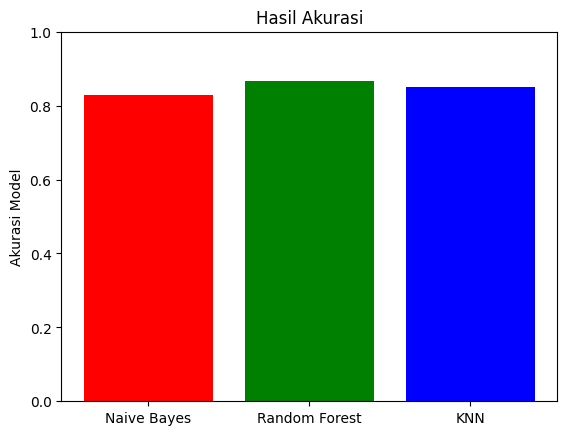

In [103]:
import matplotlib.pyplot as plt

models = ['Naive Bayes', 'Random Forest', 'KNN']
accuracies = [accuracy_naiveBayes,accuracy_rf,accuracy_knn]

plt.bar(models, accuracies, color=[ 'red', 'green', 'blue'])
plt.ylabel('Akurasi Model')
plt.title('Hasil Akurasi')
plt.ylim(0, 1)
plt.show()